### Oi Renex, tudo bem?

Cada célula abaixo precisa ser executada em ordem. Pra executar uma célula, e ir pra próxima, aperta **shift-enter**. Pode começar por essa.

Roda essas próximas duas pfv, elas carregam as bibliotecas e definem a função de desenhar os vetores

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_session(use_latex = True)
%matplotlib inline
V1s, V2s = symbols('V_1 V_2')

IPython console for SymPy 1.3 (Python 3.7.1-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [321]:
def draw_vectors(V1, V2, xlim1, ylim1, xlim2, ylim2, origin1, origin2):
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.tight_layout()
    
    ax[0].quiver(*origin1, V1[0,:], V1[1,:], color = ['#005050', '#005050', '#aa0000'], angles = 'xy', scale_units = 'xy', scale = 1)
    for u, v in V1.T:
        ax[0].annotate("({u}, {v})".format(u=u, v=v), xy=(u,v))
    ax[0].spines['right'].set_position('zero')
    ax[0].spines['left'].set_position('zero')
    ax[0].spines['top'].set_position('zero')
    ax[0].spines['bottom'].set_position('zero')
    ax[0].set_xlim(*xlim1)
    ax[0].set_ylim(*ylim1)
    ax[0].grid(True)
    
    ax[1].quiver(*origin2, V2[0,:], V2[1,:], color = ['#005050', '#005050', '#aa0000'], angles = 'xy', scale_units = 'xy', scale = 1)
    for u, v in V2.T:
        u += origin2[0]
        u = float(u)
        v += origin2[1]
        v = float(v)
        ax[1].annotate("({u}, {v})".format(u=u, v=v), xy=(u,v))
    ax[1].spines['right'].set_position('zero')
    ax[1].spines['left'].set_position('zero')
    ax[1].spines['top'].set_position('zero')
    ax[1].spines['bottom'].set_position('zero')
    ax[1].set_xlim(*xlim2)
    ax[1].set_ylim(*ylim2)
    ax[1].grid(True)
    
    plt.show()

Na próxima célula são os parâmetros pra definir os gráficos. Eu explico o que cada um faz no comentário no final de cada linha

**Gráfico da esquerda:**

In [322]:
xlim1 = (-7,7) # limites do eixo x
ylim1 = (-7,7) # limites do eixo y
origin1 = [0,0] # origem dos vetores

**Gráfico da direita:**

In [323]:
xlim2 = (-7,7) # limites do eixo x
ylim2 = (-7,7) # limites do eixo y
origin2 = [0,0] # origem dos vetores

Aqui eu defini um problema simples:

$$
\begin{bmatrix}
2 & 1 & -1\\
-1 & 5 & -3
\end{bmatrix}
$$

In [324]:
# definição dos vetores

V1 = np.array(
    [[2.0, 1.0, -1.0],
    [-1.0, 5.0, -3.0]]
) # precisa dos .0 pra ele entender que é número real e não inteiro


V2 = np.copy(V1) # copia V1 pra V2 pra usar no gráfico da direita

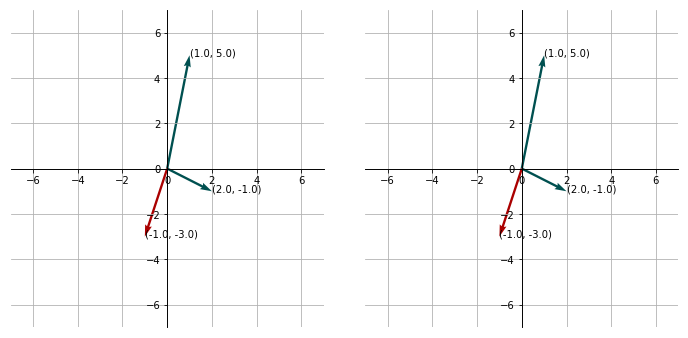

In [325]:
# desenha os vetores com os parâmetros definidos acima
draw_vectors(V1, V2, xlim1, ylim1, xlim2, ylim2, origin1, origin2)

A partir daqui, o que eu to fazendo é basicamente:

1. Aplicar a transformação nos vetores
2. Desenhar o gráfico da esquerda no plano cartesiano "normal"
3. Desenhar o gráfico da direita com o outro sistema de coordenadas

Então por exemplo:

In [326]:
# importante: colunas e fileiras são numeradas 0, 1, 2...
# dois pontos representam a coluna toda ou a fileira toda

V1[0,:] = V1[0,:] / 2 # divide todas as colunas da fileira 0 por 2
V2[0,:] = V2[0,:] / 2 # divide todas as colunas da fileira 0 por 2

xlim2 = np.array(xlim2)/2 # divide os limites do gráfico da direita por 2


Aqui mostra a situação atual das matrizes:

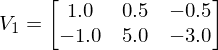

In [327]:
Eq(V1s, Matrix(V1), evaluate = False)

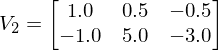

In [328]:
Eq(V2s, Matrix(V2), evaluate = False)

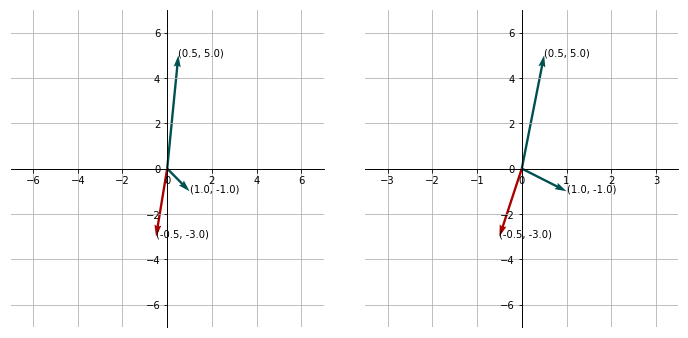

In [329]:
# desenha os gráficos de novo
draw_vectors(V1, V2, xlim1, ylim1, xlim2, ylim2, origin1, origin2)

Então aqui em cima parece que deu certo. Entre a primeira vez e a segunda vez que desenhamos os gráficos, o gráfico da direita continua com os mesmos vetores.

Daqui pra baixo é que a coisa fica estranha. O próximo passo seria somar a fileira 0 à fileira 1:

In [330]:
V1[1,:] = V1[1,:] + V1[0,:] # soma fileira 0 à fileira 1
V2[1,:] = V2[1,:] + V2[0,:] # soma fileira 0 à fileira 1

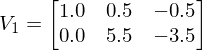

In [331]:
Eq(V1s, Matrix(V1), evaluate = False)

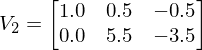

In [332]:
Eq(V2s, Matrix(V2), evaluate = False)

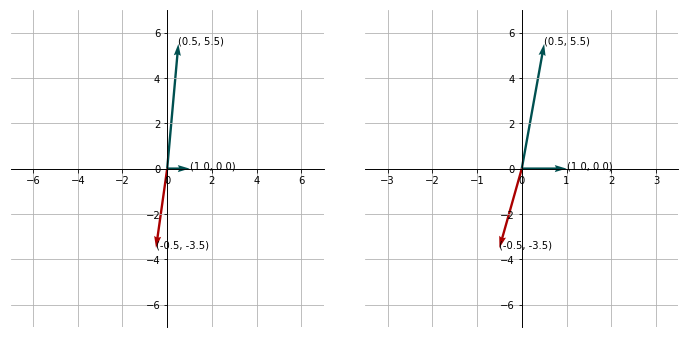

In [333]:
draw_vectors(V1, V2, xlim1, ylim1, xlim2, ylim2, origin1, origin2)

E foi aqui que eu parei. Eu precisaria mexer nos eixos pro gráfico da direita ficar como estava acima, mas os vetores mudaram. Por exemplo, daria pra mudar a origem dos vetores da direita:

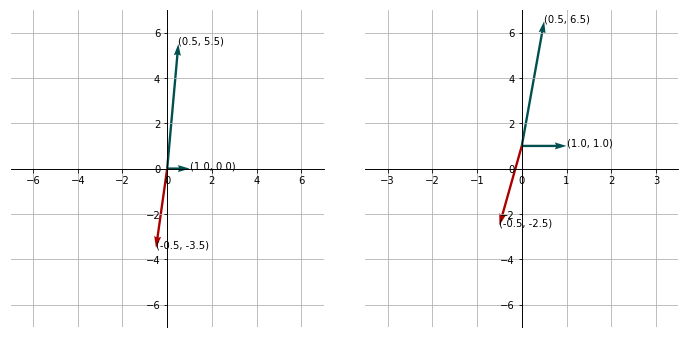

In [334]:
origin2 = [0],[1]
draw_vectors(V1, V2, xlim1, ylim1, xlim2, ylim2, origin1, origin2)

Mas aí, pra que os vetores terminem nas mesmas coordenadas, eu teria que deixar $V2$ diferente de $V1$, e isso meio que derrota todo o propósito do exercício, não? 

Enfim, por enquanto era isso. Se puder me dar uma luz eu agradeço :D
